<a href="https://colab.research.google.com/github/nadavfedida/SIT320/blob/main/Mod_2a_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2a: Trees

Lab associated with Module 2a: Trees

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [3]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [4]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

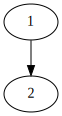

In [5]:
dot

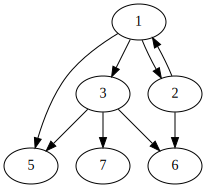

In [6]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [9]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [7]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [10]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [11]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [12]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [13]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

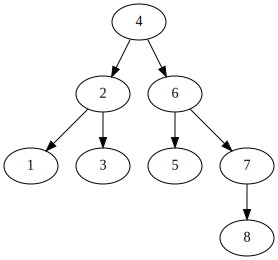

In [14]:
dot = visualize_tree(test1_tree)

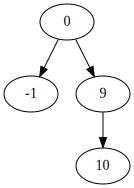

In [15]:
dot = visualize_tree(test2_tree)

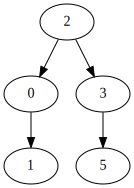

In [16]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing Search, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [17]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [18]:
search(test3_tree, 3)

True

In [19]:
search(test1_tree, 18)

False

Let us write insert function now:

In [20]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

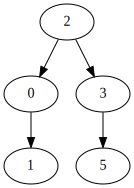

In [21]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

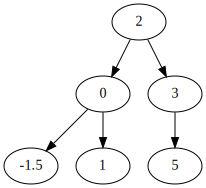

In [22]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [23]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

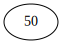

In [24]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

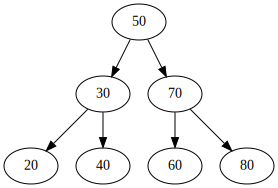

In [25]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

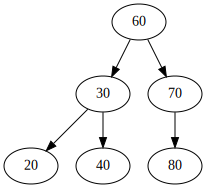

In [26]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write an algorithm (and code) to check if a binary search tree is balanced. For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one. </font>

In [27]:
### TODO ###
### Good Luck ###

class Node:
  def __init__(self , val):
    self.data = val
    self.left = None
    self.right = None

def TreeHeight(root):
  if root is None:
    return 0
  return max(TreeHeight(root.left), TreeHeight(root.right))+1

def isBalanced(root):
  if root is None:
    return True
  
  LeftHeight = TreeHeight(root.left)
  RightHeight = TreeHeight(root.right)

  if (abs(LeftHeight - RightHeight) <= 1)and isBalanced(root.left) is True and isBalanced(root.right) is True:
    return True
  return False







***

### <font color='red'> Section 5: Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree. </font>

In [ ]:
#### TODO ####
### Good Luck ###

# Pseudo Code

#1. Search path from root to left ancestor and store all visted nodes in an array
#2. Search path from root to right ancestor and store all visted nodes in an array
#3. Starting from the end of each array, in reverse order, compare values and return at first instance of matching values.
#4. if no match, return False (or -1)






***

### <font color='red'> Section 6: Write an algorithm (and code) to perform a left and right rotation on any specified node of a BST? Your function should take in the tree, as well as a node as input argument, and then return a tree in which rotation is performed. </font>

In [ ]:
#### TODO ####
### Good Luck ###


    






***

### Section 6: Insertion in an AVL Tree

In [ ]:
class TreeNode(object):

    def __init__(self, val):
        
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
 
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key):
     
        # Step 1 - Perform normal BST
        if not root:
            return TreeNode(key)
        elif key < root.val:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
 
    def leftRotate(self, z):
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
 
        y = z.left
        T3 = y.right
 
        # Perform rotation
        y.right = z
        z.left = T3
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 


In [ ]:
myTree = AVL_Tree()
root = None
 
root = myTree.insert(root, 10)
root = myTree.insert(root, 20)
root = myTree.insert(root, 30)
root = myTree.insert(root, 40)
root = myTree.insert(root, 50)
root = myTree.insert(root, 25)
root = myTree.insert(root, 60)
root = myTree.insert(root, 70)
root = myTree.insert(root, 80)


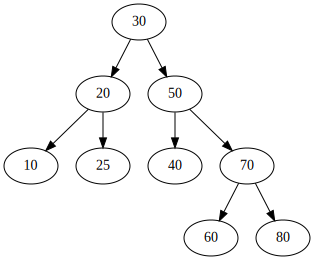

In [ ]:
dot = visualize_tree(root)

***